# Практическая работа 6

## 1 Найти данные для кластеризации. Данные в группе не должны повторяться. Если признаки в данных имеют очень сильно разные масштабы, то необходимо данные предварительно нормализовать

In [28]:
import pandas as pd

data = pd.read_csv(r'D:\projects\PycharmProjects\MireaBigData\pr6\marketing_campaign.csv', sep="\t")
data.info()
data.head()
data.dropna(inplace=True)
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2215 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntGoldProds         2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## 2 Провести кластеризацию данных с помощью алгоритма k-means. Использовать «правило локтя» и коэффициент силуэта для поиска оптимального количества кластеров

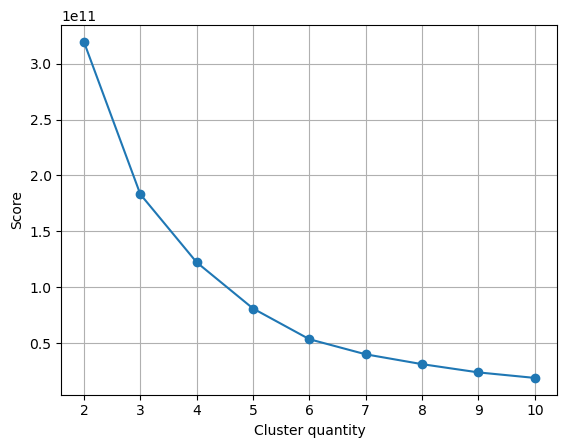

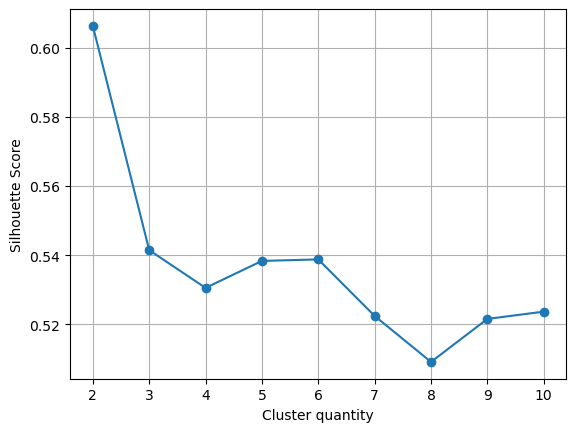

Cluster
5    527
3    497
0    486
1    367
2    331
4      7
Name: count, dtype: int64


In [29]:
from matplotlib import pyplot as plt
from matplotlib.figure import Figure
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objs as go
from sklearn.preprocessing import MaxAbsScaler


def make_plot(xvalues, yvalues, xlabel, ylabel):
    Figure()
    plt.grid()
    plt.plot(xvalues, yvalues, marker="o")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

data = data.dropna()
data = data.drop(["Education", "Marital_Status", "ID", "Dt_Customer", "Year_Birth"], axis=1)

models = list()
score = list()
silhouette_scores = list()
for i in range(2, 11):
    model = KMeans(n_clusters=i, random_state=111, init="k-means++").fit(data)
    models.append(model)
    score.append(model.inertia_)
    silhouette_scores.append(silhouette_score(data, model.labels_))

make_plot(range(2, 11), score, "Cluster quantity", "Score")
make_plot(range(2, 11), silhouette_scores, "Cluster quantity", "Silhouette Score")

model1 = KMeans(n_clusters=6, random_state=111, init="k-means++")
model1.fit(data)

data["Cluster"] = model1.labels_
print(data["Cluster"].value_counts())

## 3 Провести кластеризацию данных с помощью алгоритма иерархической кластеризации

In [30]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
import plotly.graph_objs as go


model2 = AgglomerativeClustering(n_clusters=6, compute_distances=True)
clustering = model2.fit(data)
data["Cluster"] = clustering.labels_

fig = go.Figure(data=[go.Scatter(x=data["MntWines"],
                                    y=data["Income"],
                                    mode="markers",
                                    marker_color=data["Cluster"]
                                    )])
fig.update_layout(xaxis_title="Amount spent on wine in last 2 years",
                    yaxis_title="Customer's yearly household income")
fig.show()

## 4 Провести кластеризацию данных с помощью алгоритма DBSCAN

In [31]:
import pandas as pd
from sklearn.cluster import DBSCAN
import plotly.graph_objs as go


model3 = DBSCAN(eps=240, min_samples=5).fit(data)
data["Cluster"] = model3.labels_
fig = go.Figure(data=[go.Scatter(x=data["MntWines"],
                                 y=data["Income"],
                                 mode="markers",
                                 marker_color=data["Cluster"]
                                 )])
fig.update_layout(xaxis_title="Amount spent on wine in last 2 years",
                  yaxis_title="Customer's yearly household income")
fig.show()



## 5 Визуализировать кластеризованные данные с помощью t-SNE или UMAP, если необходимо. Если данные трехмерные, то можно использовать трехмерный точечный график

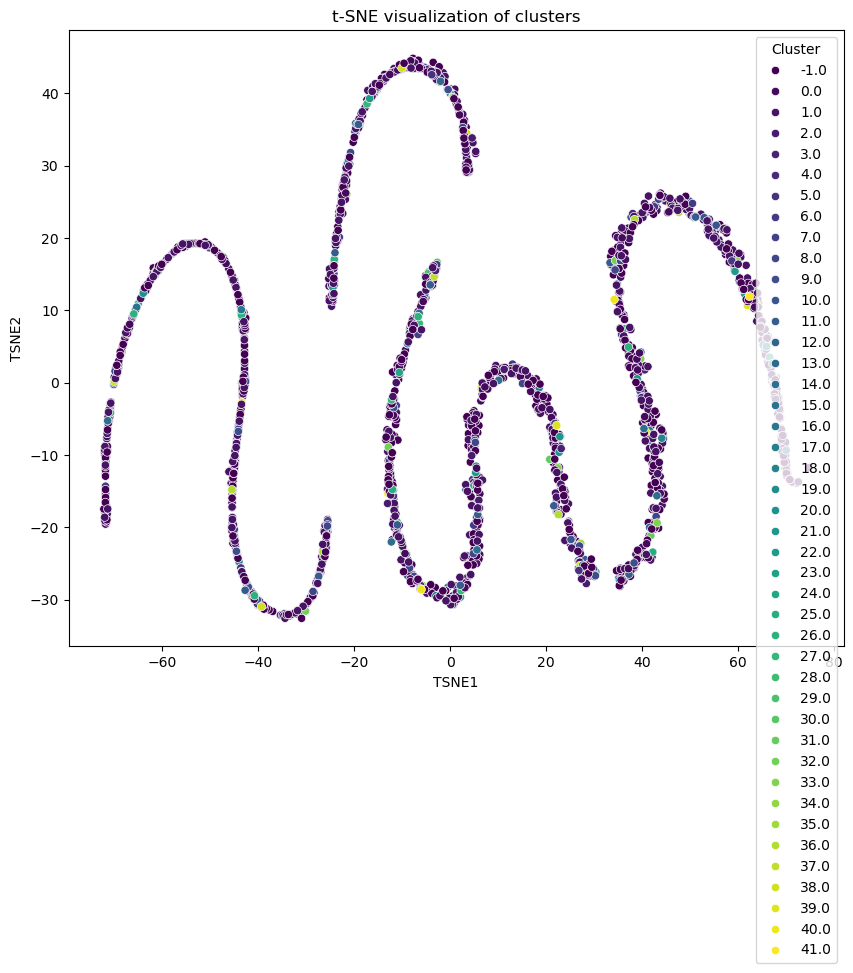

In [32]:
from sklearn.manifold import TSNE
import seaborn as sns

# Initialize TSNE
tsne = TSNE(n_components=2, random_state=111)

# Fit and transform the data
tsne_results = tsne.fit_transform(data.drop("Cluster", axis=1))

# Create a DataFrame for the results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = data['Cluster']

# Plot the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', palette='viridis', data=tsne_df, legend='full')
plt.title('t-SNE visualization of clusters')
plt.show()

C:\Users\user\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



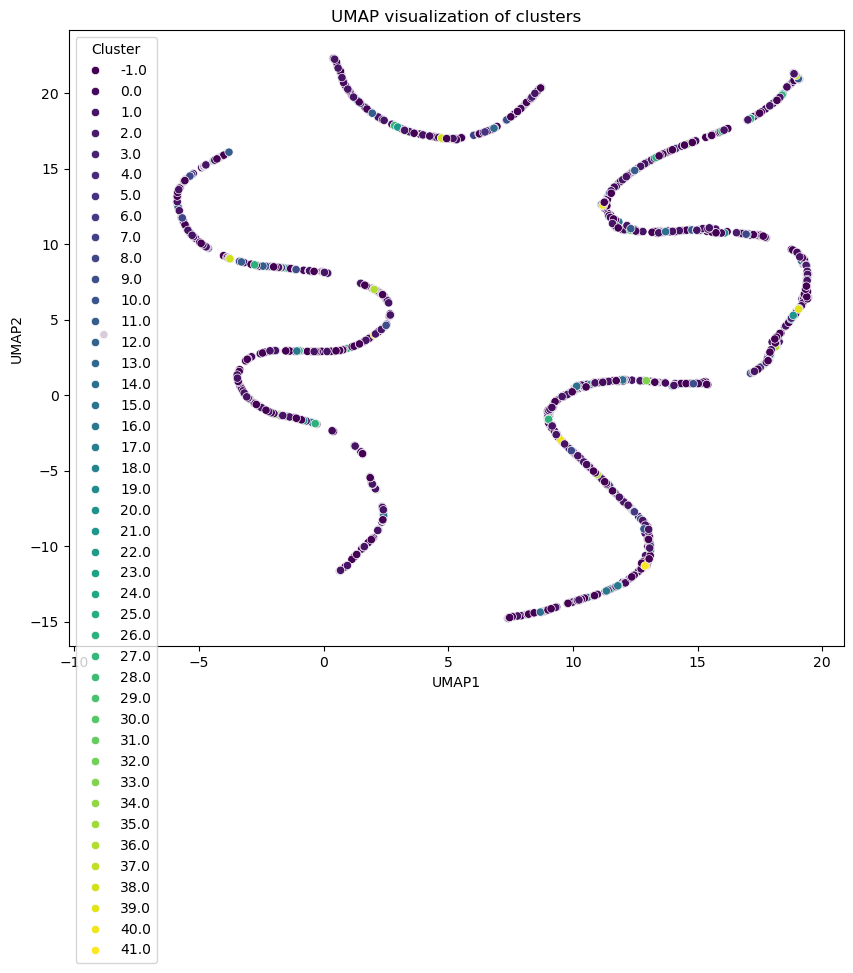

In [33]:
import umap
import seaborn as sns

import matplotlib.pyplot as plt

# Initialize UMAP
umap_model = umap.UMAP(n_components=2, random_state=111)

# Fit and transform the data
umap_results = umap_model.fit_transform(data.drop("Cluster", axis=1))

# Create a DataFrame for the results
umap_df = pd.DataFrame(umap_results, columns=['UMAP1', 'UMAP2'])
umap_df['Cluster'] = data['Cluster']

# Plot the results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='Cluster', palette='viridis', data=umap_df, legend='full')
plt.title('UMAP visualization of clusters')
plt.show()